<a href="https://colab.research.google.com/github/AfrizalDS/MachineLearning/blob/Quiz-2/quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

Face recognition

(-0.5, 353.5, 471.5, -0.5)

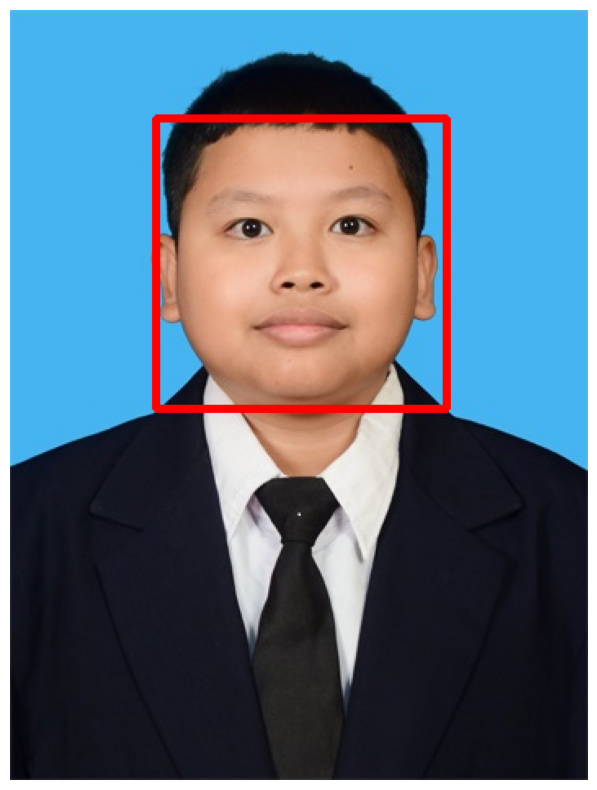

In [20]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import os

imagePath = "/content/dsc-3610-3-snhwi-e6KRM.jpg"
img = cv2.imread(imagePath)
img.shape
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 4)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi classifier Haar Cascade
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Mengakses webcam (0 untuk webcam default)
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Kamera tidak dapat diakses")
else:
    print("Kamera berhasil diakses")

while True:
    # Membaca frame dari webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Konversi frame ke grayscale untuk deteksi wajah
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah dalam frame
    faces = face_classifier.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )

    # Menggambar kotak di sekitar wajah yang terdeteksi
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Menampilkan frame dengan wajah yang terdeteksi menggunakan matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Ubah ke RGB untuk Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(frame_rgb)
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()

    # Keluar dengan menekan tombol 'q'
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

# Melepas capture
cap.release()


Kamera tidak dapat diakses


Face Recognition

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/input"))

# Any results you write to the current directory are saved as output.

[]


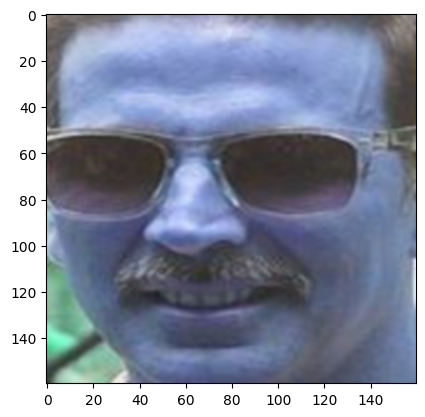

(160, 160, 3)


In [24]:
img = cv2.imread('/content/drive/MyDrive/MachineLearning/Dataset/Faces/Akshay Kumar/Akshay Kumar_0.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

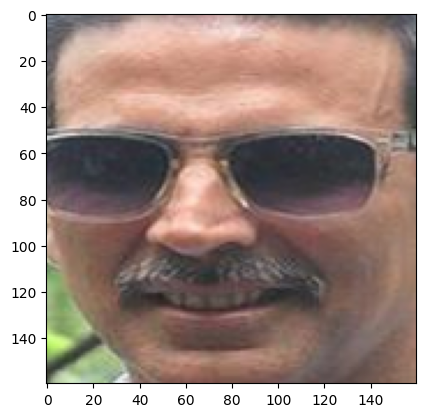

(160, 160, 3)


In [25]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('/content/drive/MyDrive/MachineLearning/Dataset/Faces/Akshay Kumar/Akshay Kumar_0.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [27]:
# load the face dataset
data = np.load('/content/drive/MyDrive/MachineLearning/Dataset')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/MachineLearning/Dataset'

In [6]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00


In [7]:
import tensorflow as tf
from keras.models import load_model
from mtcnn import MTCNN
import cv2
import numpy as np
import os

# Load FaceNet pre-trained model
facenet_model = load_model('')
print("FaceNet model loaded.")

# Load MTCNN for face detection
detector = MTCNN()

# Fungsi untuk mendapatkan embedding dari wajah
def get_embedding(model, face):
    face = face.astype('float32')
    mean, std = face.mean(), face.std()
    face = (face - mean) / std
    face = np.expand_dims(face, axis=0)
    yhat = model.predict(face)
    return yhat[0]

# Fungsi untuk memuat dataset dan mengekstraksi embedding
def load_dataset_and_extract_embeddings(dataset_path):
    embeddings = []
    labels = []

    for person_name in os.listdir(dataset_path):
        person_folder = os.path.join(dataset_path, person_name)

        if os.path.isdir(person_folder):
            for image_name in os.listdir(person_folder):
                image_path = os.path.join(person_folder, image_name)
                img = cv2.imread(image_path)

                if img is not None:
                    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    faces = detector.detect_faces(rgb_img)

                    if len(faces) > 0:
                        x, y, w, h = faces[0]['box']
                        face = rgb_img[y:y+h, x:x+w]
                        face = cv2.resize(face, (160, 160))
                        face = (face - 127.5) / 128.0

                        embedding = get_embedding(facenet_model, face)
                        embeddings.append(embedding)
                        labels.append(person_name)

    return np.array(embeddings), np.array(labels)

# Path ke dataset di Google Drive
dataset_path = '/content/drive/MyDrive/MachineLearning/Face-Dataset'
embeddings, labels = load_dataset_and_extract_embeddings(dataset_path)

print('Embedding shape:', embeddings.shape)
print('Labels:', labels)

# Simpan hasil embedding dan label
np.savez_compressed('face_embeddings.npz', embeddings, labels)
print("Dataset embeddings berhasil disimpan.")


UnimplementedError: File system scheme 'https' not implemented (file: 'https://github.com/nyoki-mtl/keras-facenet/raw/master/model/facenet_keras.h5')